In [19]:
import numpy as np
import pandas as pd
import os
import shutil
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

In [20]:
label_map = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
print("Labels: ", label_map.keys())

Labels:  dict_keys(['1', '2', '3', '4', '5'])


In [21]:

# input_dir = "images/"
# output_dir = "output/"

# os.makedirs(output_dir, exist_ok=True)

# for category in os.listdir(input_dir):
#     category_path = os.path.join(input_dir, category)
#     output_category_path = os.path.join(output_dir, category)
    
#     os.makedirs(output_category_path, exist_ok=True)
    
#     for img_file in os.listdir(category_path):
#         img_path = os.path.join(category_path, img_file)
#         img = cv2.imread(img_path)
        
#         resized_img = cv2.resize(img, (50, 50))
        
#         output_path = os.path.join(output_category_path, img_file)
#         cv2.imwrite(output_path, resized_img)

# print("All images resized and saved successfully.")


In [22]:
images_path = r'C:\Users\Gowrish\Desktop\output\output/'

In [23]:
x, y = [], []
for category in range(1, 6):
    scategory = str(category)
    cat_images_path = images_path + scategory + '/'
    for cat_single in os.listdir(cat_images_path):
        img_path = images_path + scategory + '/' + cat_single
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(label_map[scategory])

In [24]:
X = np.array(x)
Y = np.array(y)
Y = to_categorical(Y)
X, Y = shuffle(X, Y, random_state=42)
categories = Y.shape[1]

In [25]:
print(X.shape, Y.shape)

(150000, 50, 50, 1) (150000, 6)


In [26]:

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape, Y_train.shape)
print("Validation set size:", X_val.shape, Y_val.shape)
print("Test set size:", X_test.shape, Y_test.shape)

Training set size: (90000, 50, 50, 1) (90000, 6)
Validation set size: (30000, 50, 50, 1) (30000, 6)
Test set size: (30000, 50, 50, 1) (30000, 6)


In [27]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

c:\Users\Gowrish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,470 (806.52 KB)

 Trainable params: 206,470 (806.52 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, "m1.keras")

checkpoint_callback = ModelCheckpoint(
    model_path,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_loss',
    verbose=1
)

In [33]:

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=25,
    callbacks=[checkpoint_callback],
    batch_size=32,
    verbose=1
)

Epoch 1/25
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9939 - loss: 0.0197
Epoch 1: val_loss did not improve from 0.07819
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 149s 53ms/step - accuracy: 0.9939 - loss: 0.0197 - val_accuracy: 0.9810 - val_loss: 0.0923
Epoch 2/25
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9942 - loss: 0.0185
Epoch 2: val_loss did not improve from 0.07819
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 166s 59ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9837 - val_loss: 0.0845
Epoch 3/25
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9940 - loss: 0.0187
Epoch 3: val_loss did not improve from 0.07819
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 168s 60ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9818 - val_loss: 0.0941
Epoch 4/25
2812/2813 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9948 - loss: 0.0174
Epoch 4: val_loss did not improve from 0.07819
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 169s 60ms/step - accuracy: 0.9948 - loss: 0.0174 - val_accu

In [34]:
import gc
gc.collect()

58209

In [35]:
best_model = load_model(model_path)

test_loss, test_accuracy = best_model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


ValueError: File not found: filepath=models\m1.keras. Please ensure the file is an accessible `.keras` zip file.

938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step


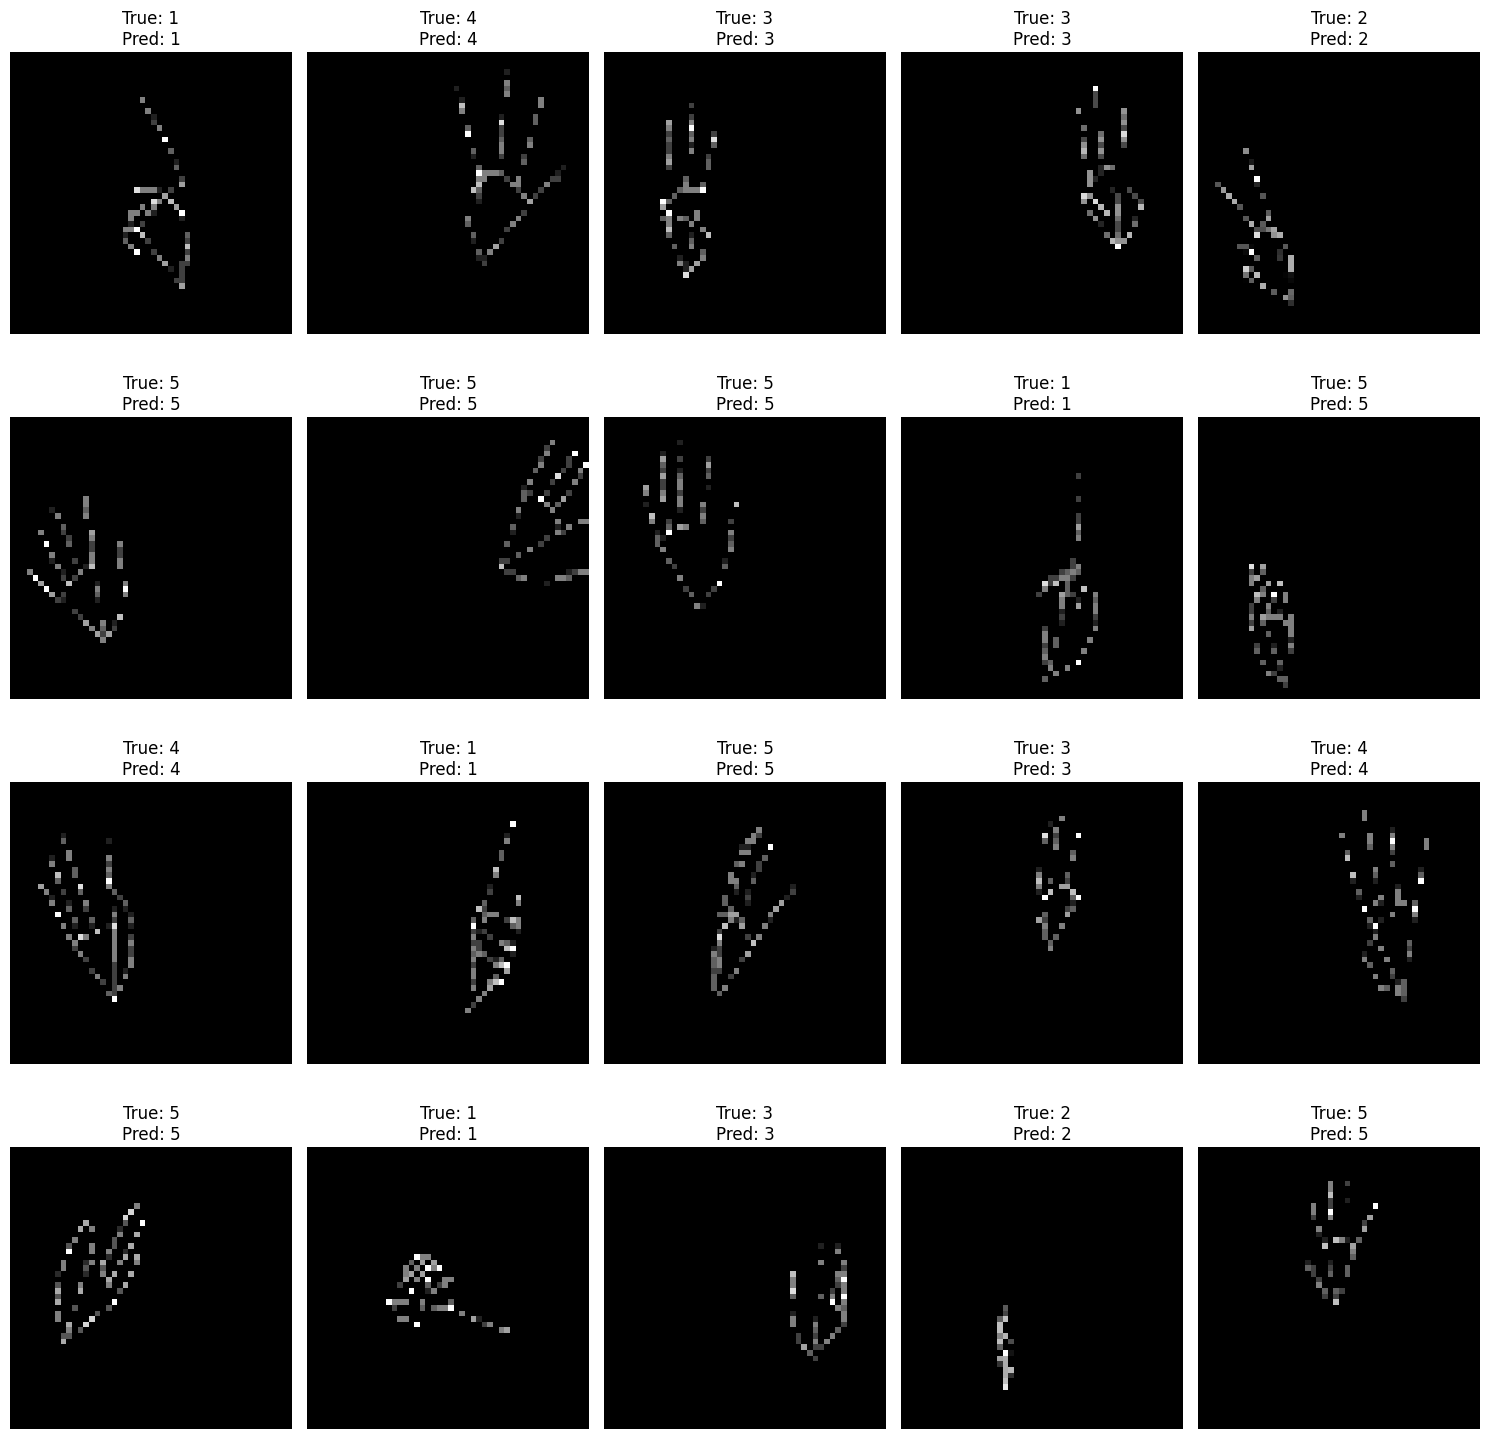

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Making predictions
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Display some images along with their predicted and true labels
num_samples = 20
num_cols = 5
num_rows = math.ceil(num_samples / num_cols)

plt.figure(figsize=(15, 15))
for i in range(num_samples):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[i].reshape(50, 50), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_classes[i]}\nPred: {predicted_classes[i]}")
plt.tight_layout()
plt.show()